In [149]:
import numpy as np 
import pandas 
from pattern.en import *
import thinkstats2
import thinkplot
import pattern

%matplotlib inline

In [150]:
data = pandas.read_csv('../train.tsv', sep = '\t') 

Looking at the data below. 

In [151]:
data

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


Cleaning the data: 

In [152]:
def clean_data(d):
    print data.Phrase[data.Phrase == ""].sum() 
    print data.Sentiment[(data.Sentiment < 0)].sum()
    print data.Sentiment[(data.Sentiment > 4)].sum()
clean_data(data)

0
0
0


In [ ]:
It seemed like there was nothing really much to clean. There was nothing really much to clean 

Looking at the data, it is clear that the first PhraseId for a setenceId is always the full sentence in its entirety. Then the sentence is broken up into smaller phrases, given a phrase Id, but linked to the same sentenceId because it is part of the same sentence. I wanted to see how the mean sentiment of each of the phrases would compare to the sentiment of the entire sentence. Results are below.

Sample, for sentence id = 1

In [153]:
phraseIdSentiments = data.Sentiment[data.PhraseId[data.SentenceId ==  1]]
phraseIdSentiments[2:len(phraseIdSentiments)].mean()

2.0327868852459017

In [154]:
phraseIdSentiments[1]

2

In [155]:
data.Sentiment[data.SentenceId == 1][0]

1

Interestingly enough the sentiment of the sentence as a whole is much lower than the mean sentiment of all of the phrases. The mean of the phrase sentiments is around 2.032 and the sentiment of the first sentence is 1. This is odd. However, this tells us an important thing: that sentiment is not linear and there is another larger equation calculating the sentiment that averaging will not give us the calculated sentiment. 

In [156]:
sentenceIds = list(set(data.SentenceId))

In [157]:
sentenceSentiments = []
phraseMeans = []
for i in sentenceIds: 
    phraseSents = data.Sentiment[data.PhraseId[data.SentenceId == i]]
#     print phraseSents[0: len(phraseSents)]
    mean = phraseSents[2:len(phraseSents)].mean(); 
    phraseMeans.append(mean)

#     print data[data.PhraseId == 156039]
    sentenceSentiments.append(data.Sentiment[data.SentenceId == i].iloc[0])
#     data.Sentiment[data.SentenceId == i].iloc[0]

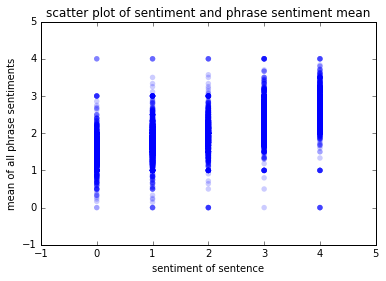

In [219]:
thinkplot.Scatter(sentenceSentiments, phraseMeans)
thinkplot.Show(xlabel = 'sentiment of sentence', ylabel = 'mean of all phrase sentiments', title = 'scatter plot of sentiment and phrase sentiment mean')

The figure above plots mean of all phase sentiments as a function of the sentiment of the whole sentence. While there are vertical lines, the vertical lines seem to be increasing, this is because sentiment is also increasing so the mean of phrases with higher sentiments would also increase. This scatter plot also shows that the mean is closests to 2 when sentiment is aoround 2. Otherwise, it looks like the mean of the phrase sentiments is not close to the actual sentiment values.

Now we want to find the most frequently used words in the sentences with highly negative sentiment

In [159]:
sids = data.SentenceId[data.Sentiment ==4]
sids = list(set(sids))
positive_phrases = []
for id in sids: 
#     print meh
    positive_phrases.append(data.Phrase[data.SentenceId == id].iloc[0])

In [161]:
p_words = {}
phrases = data.SentenceId[data.Phrase[data.Sentiment ==4]]
for sentence in positive_phrases:
#     print(phrase)
    all_info = sentence.split()
    for word in all_info: 
#         print(word)
        if(word not in p_words): 
            p_words[word] = 1
        else: 
            p_words[word] += 1

In [162]:
p_words

{'unimaginative': 1,
 'Poetry': 1,
 'foul': 2,
 'Sugar': 5,
 'four': 6,
 'woods': 1,
 'hanging': 1,
 'conjuring': 1,
 'comically': 1,
 'Until': 3,
 'marching': 1,
 'satisfyingly': 2,
 'originality': 8,
 'superficially': 1,
 'xtc': 1,
 'funk': 1,
 'lore': 1,
 'Refreshing': 1,
 'Blade': 4,
 'bringing': 5,
 'ruinous': 1,
 'disturb': 2,
 'grueling': 1,
 'Less': 2,
 'Sundance': 2,
 'succession': 1,
 'stereotypical': 2,
 'Paul': 2,
 'straight': 2,
 'bill': 1,
 'less-is-more': 1,
 'tired': 1,
 'pulse': 1,
 '270': 1,
 'elegant': 8,
 'second': 5,
 'valiant': 2,
 'Charade': 1,
 'driven': 3,
 'admire': 6,
 'ruthless': 1,
 'contributed': 1,
 'fingers': 1,
 'nerve-raked': 1,
 'payoff': 1,
 'succumb': 2,
 'shocks': 2,
 'insinuation': 1,
 'hero': 12,
 'divertissement': 1,
 'here': 25,
 'cult': 5,
 'natured': 1,
 'transfixes': 1,
 'substance': 2,
 'uplifting': 6,
 'pretensions': 2,
 'elaborate': 2,
 'Feathers': 2,
 'hard-driving': 1,
 'controversy': 2,
 'grade-school': 1,
 'Isabelle': 1,
 'Goliath': 1

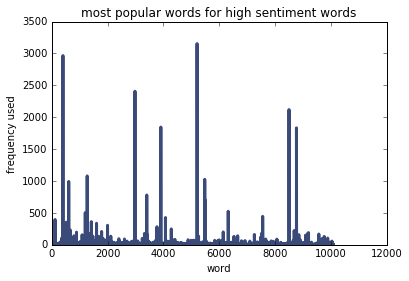

In [224]:
xs = np.arange(0, len(p_words), 1)
thinkplot.plot(xs, p_words.values())
thinkplot.show(xlabel = 'word', ylabel = 'frequency used', title = 'most popular words for high sentiment words')

This is interesting because it looks like there are a few outliers, but the majority of the data is in the lower part of the graph. Out of curiosity, I want to see what string corresponds is the most frequently used. Therefore, they are ordered below.

In [225]:
for word in p_words: 
    print(word, p_words[word])

('unimaginative', 1)
('Poetry', 1)
('foul', 2)
('Sugar', 5)
('four', 6)
('woods', 1)
('hanging', 1)
('conjuring', 1)
('comically', 1)
('Until', 3)
('marching', 1)
('satisfyingly', 2)
('originality', 8)
('superficially', 1)
('xtc', 1)
('funk', 1)
('lore', 1)
('Refreshing', 1)
('Blade', 4)
('bringing', 5)
('ruinous', 1)
('disturb', 2)
('grueling', 1)
('Less', 2)
('Sundance', 2)
('succession', 1)
('stereotypical', 2)
('Paul', 2)
('straight', 2)
('bill', 1)
('less-is-more', 1)
('tired', 1)
('pulse', 1)
('270', 1)
('elegant', 8)
('second', 5)
('valiant', 2)
('Charade', 1)
('driven', 3)
('admire', 6)
('ruthless', 1)
('contributed', 1)
('fingers', 1)
('nerve-raked', 1)
('payoff', 1)
('succumb', 2)
('shocks', 2)
('insinuation', 1)
('hero', 12)
('divertissement', 1)
('here', 25)
('cult', 5)
('natured', 1)
('transfixes', 1)
('substance', 2)
('uplifting', 6)
('pretensions', 2)
('elaborate', 2)
('Feathers', 2)
('hard-driving', 1)
('controversy', 2)
('grade-school', 1)
('Isabelle', 1)
('Goliath', 1

In [226]:
for w in sorted(p_words, key=p_words.get, reverse=True):
    print (w, p_words[w])

(',', 3155)
('.', 2967)
('the', 2408)
('and', 2120)
('a', 1846)
('of', 1833)
('to', 1080)
('is', 1027)
("'s", 993)
('that', 781)
('in', 709)
('it', 650)
('film', 525)
('with', 505)
('as', 447)
('but', 446)
('The', 427)
('A', 397)
('its', 363)
('an', 362)
('for', 355)
('movie', 338)
('this', 306)
('you', 283)
('...', 249)
('be', 231)
('on', 228)
('It', 224)
('has', 216)
('by', 209)
('--', 207)
("n't", 202)
('one', 199)
('are', 190)
('about', 185)
('his', 182)
('not', 178)
('more', 175)
('than', 169)
('from', 169)
('have', 162)
('all', 159)
('I', 157)
('at', 157)
('story', 151)
('so', 142)
('most', 141)
('-LRB-', 137)
('-RRB-', 136)
("'", 135)
('funny', 133)
('good', 132)
('who', 131)
('like', 120)
('best', 107)
('into', 107)
('comedy', 106)
('will', 106)
('or', 103)
('can', 101)
("''", 100)
('``', 100)
('up', 98)
('out', 97)
('does', 95)
('their', 92)
('work', 91)
('This', 91)
('very', 90)
('some', 90)
('characters', 89)
('performances', 88)
('much', 87)
('love', 87)
('make', 87)
('An',

As is the case, it seems like the most popular word was: ",". This is to be expected because I did not filter by puncutation. Beyond that, frequently occuring words are "and" and "the". These are the most common words in the english language. Past small pronouns, high scoring words are like "best" and "funny" and "film". Anne tried filtering out small, redundant words!

Now let's try the most negative scoring words! 

In [166]:
data.Phrase[data.Sentiment ==0]

101         would have a hard time sitting through this one
103               have a hard time sitting through this one
157       Aggressive self-glorification and a manipulati...
159         self-glorification and a manipulative whitewash
201                  Trouble Every Day is a plodding mess .
208                                      is a plodding mess
210                                           plodding mess
261                       could hate it for the same reason
264                                                 hate it
265                                                    hate
311       is Oedekerk 's realization of his childhood dr...
430          baseball movies that try too hard to be mythic
848       Hampered -- no , paralyzed -- by a self-indulg...
861                                 a self-indulgent script
919       There 's very little sense to what 's going on...
1001                                                  avoid
1003      almost feels as if the movie i

In [167]:
sids = data.SentenceId[data.Sentiment ==4]
sids = list(set(sids))
negative_phrases = []
for id in sids: 
#     print meh
    negative_phrases.append(data.Phrase[data.SentenceId == id].iloc[0])

In [168]:
n_words = {}
phrases = data.Phrase[data.Sentiment ==0]
for sentence in negative_phrases:
#     print(phrase)
    all_info = sentence.split()
    for word in all_info: 
        if(word not in n_words): 
            n_words[word] = 1
        else: 
            n_words[word] += 1
        

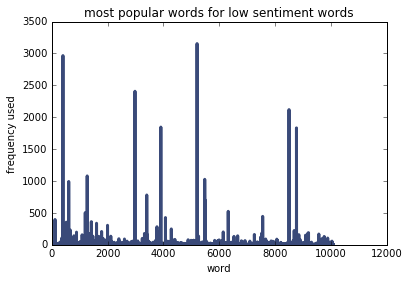

In [169]:
xs = np.arange(0, len(n_words), 1)
thinkplot.plot(xs, n_words.values())
thinkplot.show(xlabel = 'word', ylabel = 'frequency used', title = 'most popular words for low sentiment words')

Again, I wonder what strings appeared around 3000 times. Ordered first chronologically and then ordered by frequency.

In [170]:
for word in n_words: 
    print(word, n_words[word])

('unimaginative', 1)
('Poetry', 1)
('foul', 2)
('Sugar', 5)
('four', 6)
('woods', 1)
('hanging', 1)
('conjuring', 1)
('comically', 1)
('Until', 3)
('marching', 1)
('satisfyingly', 2)
('originality', 8)
('superficially', 1)
('xtc', 1)
('funk', 1)
('lore', 1)
('Refreshing', 1)
('Blade', 4)
('bringing', 5)
('ruinous', 1)
('disturb', 2)
('grueling', 1)
('Less', 2)
('Sundance', 2)
('succession', 1)
('stereotypical', 2)
('Paul', 2)
('straight', 2)
('bill', 1)
('less-is-more', 1)
('tired', 1)
('pulse', 1)
('270', 1)
('elegant', 8)
('second', 5)
('valiant', 2)
('Charade', 1)
('driven', 3)
('admire', 6)
('ruthless', 1)
('contributed', 1)
('fingers', 1)
('nerve-raked', 1)
('payoff', 1)
('succumb', 2)
('shocks', 2)
('insinuation', 1)
('hero', 12)
('divertissement', 1)
('here', 25)
('cult', 5)
('natured', 1)
('transfixes', 1)
('substance', 2)
('uplifting', 6)
('pretensions', 2)
('elaborate', 2)
('Feathers', 2)
('hard-driving', 1)
('controversy', 2)
('grade-school', 1)
('Isabelle', 1)
('Goliath', 1

In [171]:
for w in sorted(n_words, key=n_words.get, reverse=True):
    print (w, n_words[w])

(',', 3155)
('.', 2967)
('the', 2408)
('and', 2120)
('a', 1846)
('of', 1833)
('to', 1080)
('is', 1027)
("'s", 993)
('that', 781)
('in', 709)
('it', 650)
('film', 525)
('with', 505)
('as', 447)
('but', 446)
('The', 427)
('A', 397)
('its', 363)
('an', 362)
('for', 355)
('movie', 338)
('this', 306)
('you', 283)
('...', 249)
('be', 231)
('on', 228)
('It', 224)
('has', 216)
('by', 209)
('--', 207)
("n't", 202)
('one', 199)
('are', 190)
('about', 185)
('his', 182)
('not', 178)
('more', 175)
('than', 169)
('from', 169)
('have', 162)
('all', 159)
('I', 157)
('at', 157)
('story', 151)
('so', 142)
('most', 141)
('-LRB-', 137)
('-RRB-', 136)
("'", 135)
('funny', 133)
('good', 132)
('who', 131)
('like', 120)
('best', 107)
('into', 107)
('comedy', 106)
('will', 106)
('or', 103)
('can', 101)
("''", 100)
('``', 100)
('up', 98)
('out', 97)
('does', 95)
('their', 92)
('work', 91)
('This', 91)
('very', 90)
('some', 90)
('characters', 89)
('performances', 88)
('much', 87)
('love', 87)
('make', 87)
('An',

Then I wanted to see if there were any words common to both of these negative and positive data sets. I thought I would get all common words like "the" and "and" and such. This was not the case, instead I got actual words many adjectives.

In [227]:
shares_words = []
for word in n_words and p_words: 
    print word
    shares_words.append(word)
print(len(shares_words))

unimaginative
Poetry
foul
Sugar
four
woods
hanging
conjuring
comically
Until
marching
satisfyingly
originality
superficially
xtc
funk
lore
Refreshing
Blade
bringing
ruinous
disturb
grueling
Less
Sundance
succession
stereotypical
Paul
straight
bill
less-is-more
tired
pulse
270
elegant
second
valiant
Charade
driven
admire
ruthless
contributed
fingers
nerve-raked
payoff
succumb
shocks
insinuation
hero
divertissement
here
cult
natured
transfixes
substance
uplifting
pretensions
elaborate
Feathers
hard-driving
controversy
grade-school
Isabelle
Goliath
appropriately
Compared
classification
replace
brought
unit
slivers
insecurity
borrow
music
therefore
Caine
strike
until
Western
Christine
successful
brings
mesmerize
hurt
ruminations
glass
hold
95
circumstances
morally
brutality
famed
accomplishment
straddle
Arwen
example
expressively
Lo
chasm
dragons
Highlighted
Brian
want
absolute
Ferrera
poverty
handguns
feature
machine
how
hot
well-constructed
Notting
retooled
dared
place
chase
preferable
c

In [173]:
sentiment("I hate potatoes, I don't have a float")

(-0.8, 0.9)

I would like to see if there is a special relationship between the length of the phrase and the subjectivity, the length of the phrase and the objectivity, and the objectivity and the subjectivity.

In [ ]:
lengths = []
sentiments = []
objectivies = []
for phrase in data.Phrase: 
    lengths.append(len(phrase))
    sent, objSub = sentiment(phrase)
    sentiments.append(sent)
    objectivies.append(objSub)

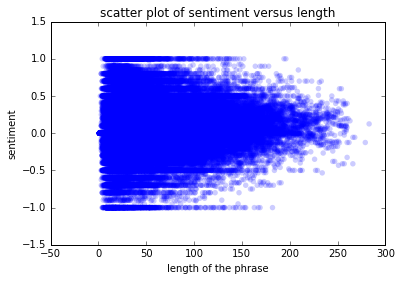

In [230]:
thinkplot.Scatter(lengths, sentiments)
thinkplot.show(xlabel = 'length of the phrase', ylabel = 'sentiment', title = 'scatter plot of sentiment versus length')

I want to know mathematically, how much are they correlated? 

In [234]:
PearsonCorr = thinkstats2.Corr(lengths, sentiments)
SpearmanCorr = thinkstats2.SpearmanCorr(lengths, sentiments)

print PearsonCorr 
print SpearmanCorr

0.0855064404244
0.1395150559


I tried to group by mean to see if there are any major points of observation or patterns worth observing.

In [187]:
data.groupby('Phrase').mean()

,PhraseId,SentenceId,Sentiment
Phrase,,,
,2006,76,1
!,1538,57,2
!?,95342,4976,2
!? ',95341,4976,2
#,42900,2072,2
# 3,117004,6241,2
# 9,42899,2072,2
$,10664,452,2
$ 1.8,16496,709,2


In [237]:
# using mood provides if indicative, imperative, conditional, or subjunctive. 
# using modality provides numerical indicator of these bins. 
print mood("I hate potatoes")
print modality("I hate potatoes")

indicative
1.0


Now I want to calculate the modality of each phrase and see if there are any correlations between the modality and the objectivity and subjectivity. 

In [210]:
lengths = []
mooods = []
objectivitiy = [] 
subjectivity = []
for phrase in data.Phrase: 
    lengths.append(len(phrase))
    mooods.append(modality(phrase))
    o, s = sentiment(phrase)
    objectivitiy.append(o) 
    subjectivity.append(s)

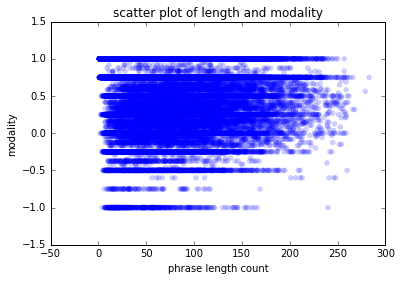

In [239]:
thinkplot.Scatter(lengths, mooods)
thinkplot.Show(xlabel = 'phrase length count', ylabel = 'modality', title = 'scatter plot of length and modality')

This scatter plot tells us that long sentences are in fact very confident. There is a hole in the scatter plot on the bottom right. This means that long sentences are not not confident. As for short sentences, this tells us that they vary in confidence. Short sentence can sound very fact based or very inifitive based. We can compute both the Pearson and Spearman Correlation to see if there is a correlation. 

In [243]:
pearson_l_m = thinkstats2.Corr(lengths, mooods)
spearman_l_m = thinkstats2.SpearmanCorr(lengths, mooods)
print pearson_l_m
print spearman_l_m

-0.35929618073
-0.415496092423


Both of these values show that there is a large negative correlation between the length of the phrases and the mood of the phrases. A negative correlation means that when one of these qualities is high, the other one is low. This could be expressed in the plot with the short phrases, some of the short phrases were really confident. There is a corrwlation here between length and moods.

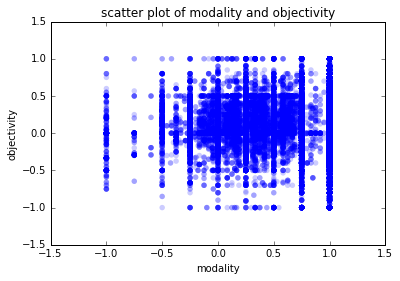

In [240]:
thinkplot.Scatter(mooods, objectivitiy)
thinkplot.Show(xlabel = 'modality', ylabel = 'objectivity', title = 'scatter plot of modality and objectivity')

This plot is very weird. However, it seems like there is a concentration of data in the center right of the plot. The majority of the data seems to be mildly objective, but confident. This can be interpreted as most of the data slightly above the 0.0 modality targey is mildly objective. Interestingly enough the data is centered around 0.0 objectivity and not far from this 0 value. 

In [245]:
pearson_m_o = thinkstats2.Corr(mooods, objectivitiy)
spearman_m_o = thinkstats2.SpearmanCorr(objectivitiy, mooods)
print pearson_m_o
print spearman_m_o

-0.060782366918
-0.109627192785


There seems to be a very small negative correlation between modality and objectivity. It is a negative value so when one is up, the other one is down. Spearman's correlation is higher than Pearson's correlation. This means there is more of a correlation in the ranking order. 
Initially, I thought this low negative correlation is honestly surprising. I would have thought there would be a higher correlation between confidence and objectivity because they are both kind of measuring the same thing. They are measuring how much the sentence sounds like a fact. Being objective, would mean very factual and that would mean a low subjectivity.  A high modality score would also mean sounding very factual, less "wishing" or "thinking". I was surprised there is not more of a correlation here, but then 

In [262]:
sentiment("I think I hate pickles")

(-0.8, 0.9)

In [263]:
sentiment("Casey hates pickles")

(0.0, 0.0)

In [264]:
modality("I think I hate pickles")

0.5

In [265]:
modality("Casey hates pickles")

1.0

The first two examples used sentiment. The first example was very subjective, hence the score of 0.9, with the "I think". The second example was very objective, more fact based, no opinions or thoughts even though I am Casey. The third and forth example used modality. By doing this exercise, I realized that the second value sentiment returns is not how objective the sentence is, but rather how subjective. A low subjectivity score means higher objectivity. Therefore, there should be a negative correlation between objectivity and modality. This shows that there is, unfortunately, the value is very low. 

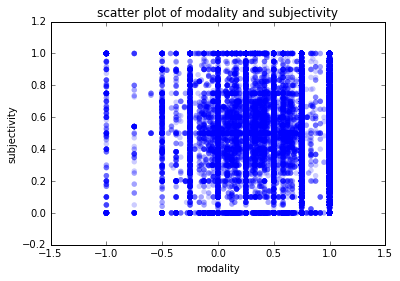

In [241]:
thinkplot.Scatter(mooods, subjectivity)
thinkplot.Show(xlabel = 'modality', ylabel = 'subjectivity', title = 'scatter plot of modality and subjectivity')

This graph is also very incredibly weird. There are many perfect vertical lines and a blob of data. The data seems to be concentrated around 0.5 subjectivity and around 0.3 modality. This essentially means that a lower than average modality score will be slightly above average on subjectivity. 

In [247]:
pearson_m_s = thinkstats2.Corr(mooods, subjectivity)
spearman_m_s = thinkstats2.SpearmanCorr(subjectivity, mooods)
print pearson_m_s
print spearman_m_s

-0.151893011341
-0.207341948382


Calculating the pearson and spearman correlation, we can see that there is a negative correlation between modality and subjectivity. The magnitude of this correlation is larger than the magnitude of the modality versus objectivity correlation. Interesting. This is also a negative correlation. This is consistent with the scatter plot. Logically subjectivity is a value returned from sentiment ranging from 0 to 1 where 1 is very subjective and 0 is very objective. Therefore, it makes sense that if a sentence is very subjective, through the exercise above, modality might not pick up that it is very confident and might provide is a value in the infitive range, a low floating point value in the negative range. 